**Simple Linear Regression**

Delivery_time -> Predict delivery time using sorting time

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#STEP 1: Importing data

In [ ]:
df= pd.read_csv("/content/delivery_time.csv")

In [ ]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#STEP 2:EDA

In [ ]:
df.shape

(21, 2)

In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.duplicated().sum()

0

In [ ]:
# change columns names
df.columns=("Delivery_time","Sorting_time")
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#STEP 3: **VISUALIZATIONS**

Plotting the data to check for outliers

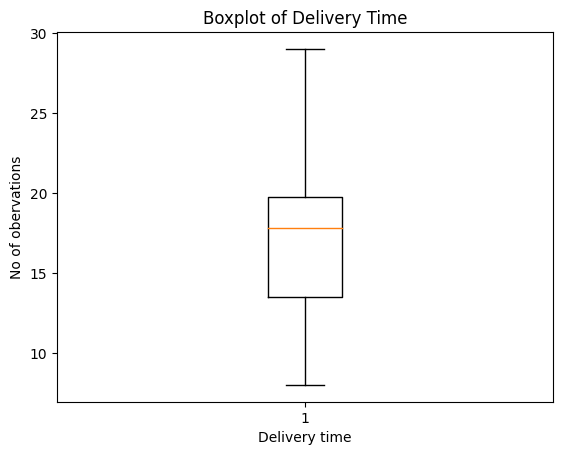

In [ ]:
plt.boxplot(df.Delivery_time)
plt.xlabel("Delivery time")
plt.ylabel("No of obervations")
plt.title("Boxplot of Delivery Time")
plt.show()

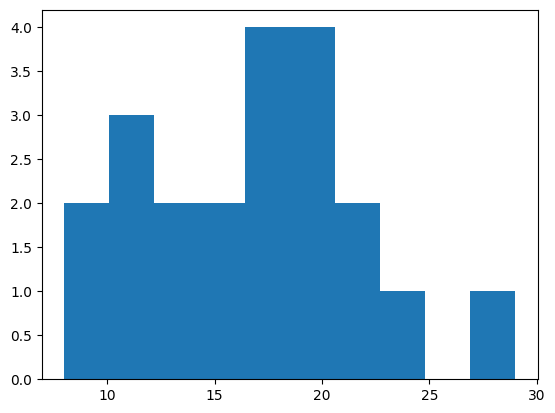

In [ ]:
plt.hist(df.Delivery_time)
plt.show()

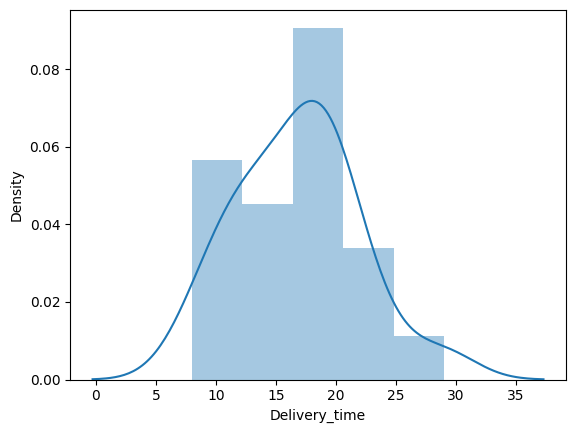

In [ ]:
sns.distplot(df['Delivery_time'])
plt.show()


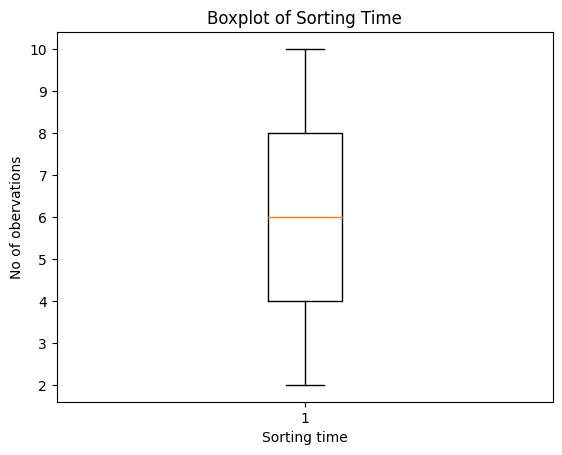

In [ ]:
plt.boxplot(df.Sorting_time)
plt.xlabel("Sorting time")
plt.ylabel("No of obervations")
plt.title("Boxplot of Sorting Time")
plt.show()

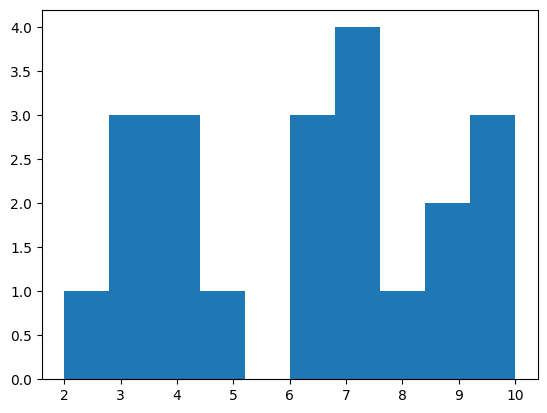

In [ ]:
plt.hist(df.Sorting_time)
plt.show()

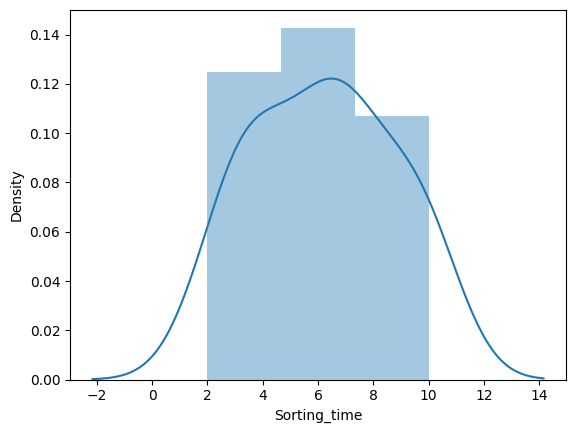

In [ ]:
sns.distplot(df['Sorting_time'])
plt.show()

[]

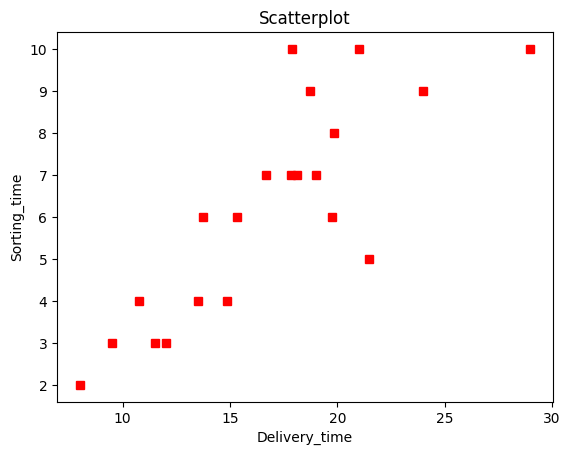

In [ ]:
plt.plot(df.Delivery_time,df.Sorting_time,"rs")
plt.xlabel("Delivery_time")
plt.ylabel("Sorting_time")
plt.title("Scatterplot")
plt.plot()

As you can see there are no Outliers in the data

#Step 4
**CORRELATION ANALYSIS**

In [ ]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


**Visualization of Correlation beteen x and y**

regplot = regression plot

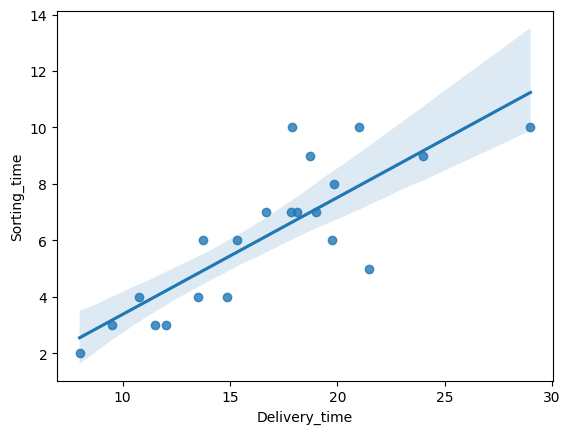

In [ ]:
sns.regplot(x="Delivery_time", y="Sorting_time", data=df);

As you can see above

There is good correlation between the two variable.

The score is more than 0.8 which is a good sign

# Step 5

Checking for Homoscedasticity or Hetroscedasticity

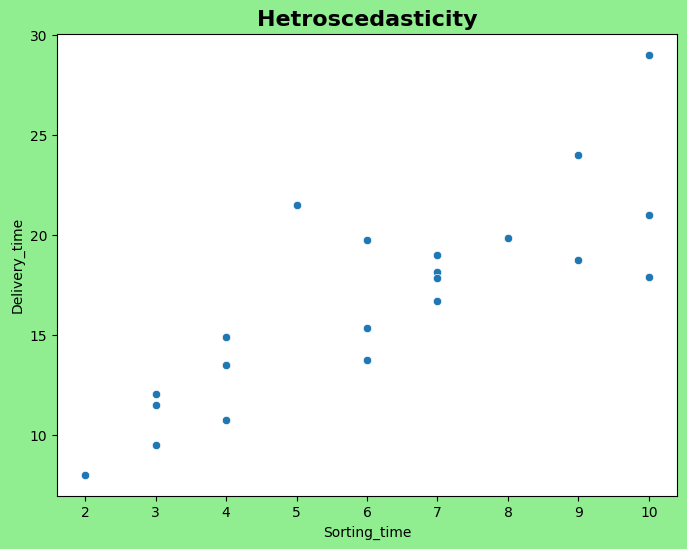

In [ ]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting_time'], y = df['Delivery_time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [ ]:
df.var()

Delivery_time    25.754619
Sorting_time      6.461905
dtype: float64

As you can see in above graph

It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way

The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

#Step 6

**Feature Engineering**

Trying different transformation of data to estimate normal distribution and to remove any skewness

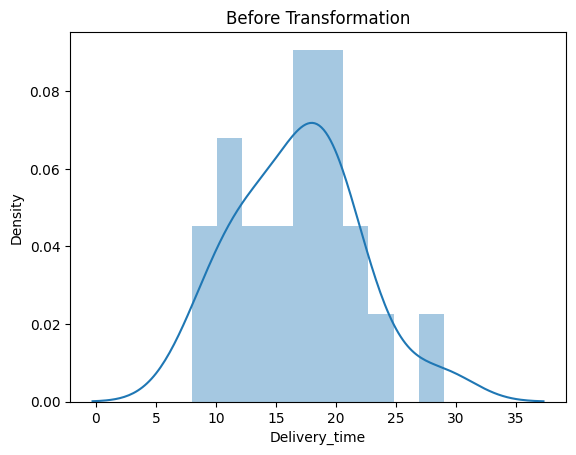

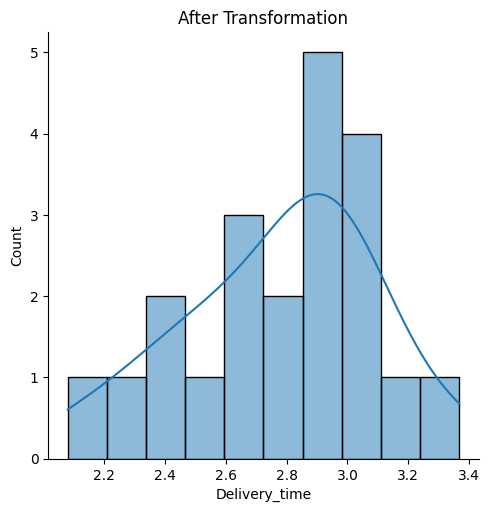

In [ ]:
sns.distplot(df['Delivery_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

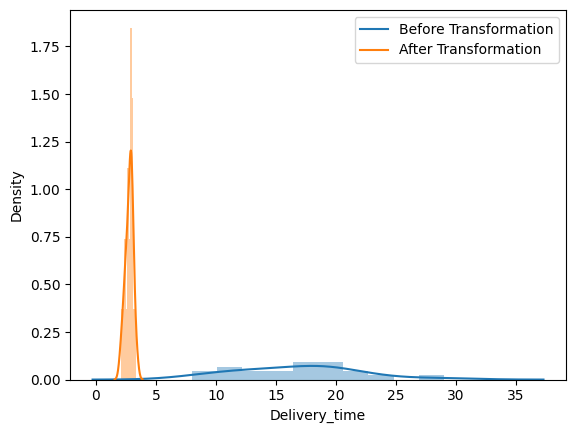

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As you can see

How log transformation affects the data and it scales the values down.

Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

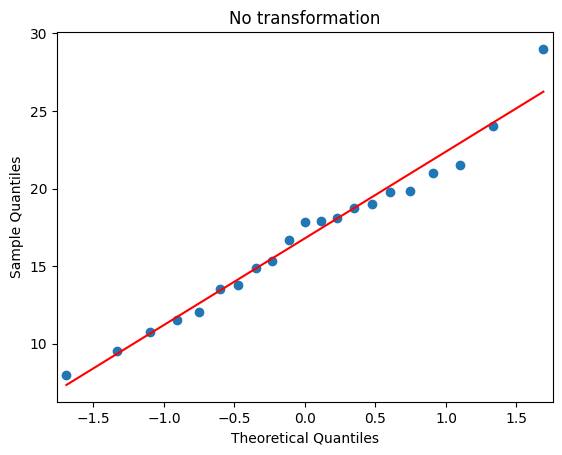

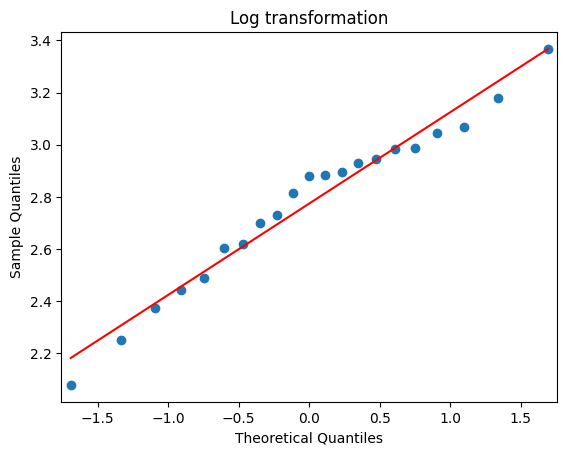

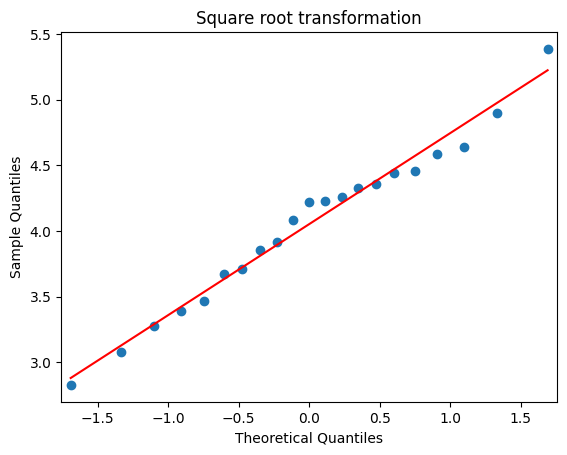

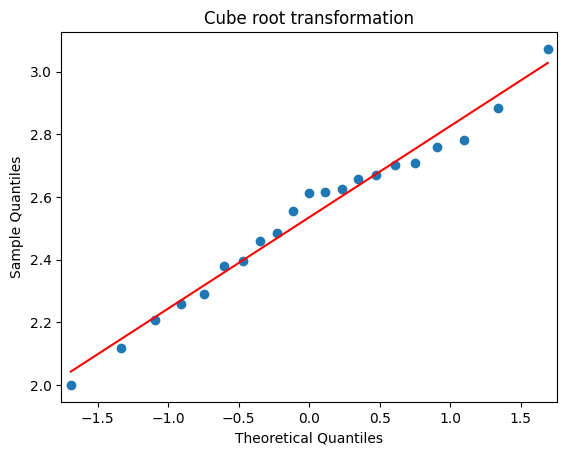

In [ ]:
smf.qqplot(df['Delivery_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

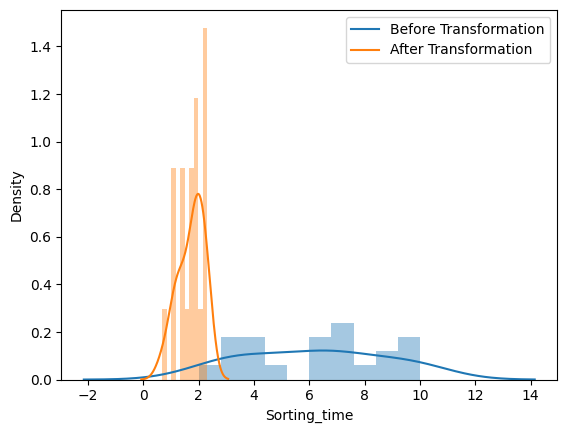

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting_time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

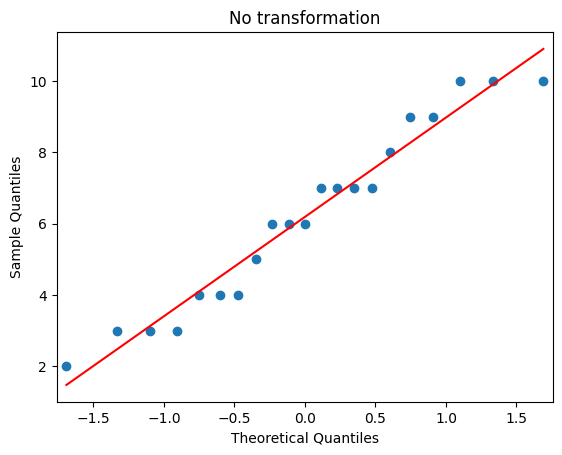

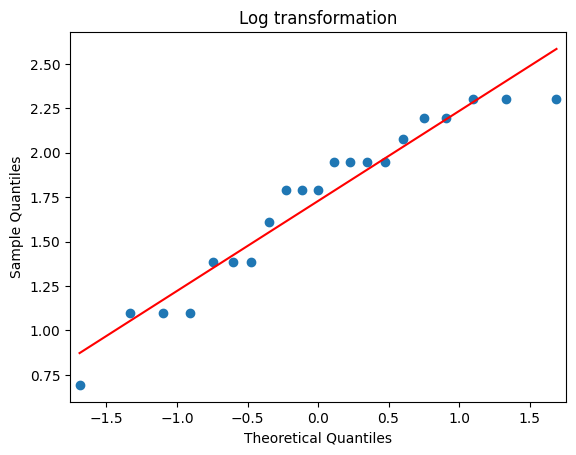

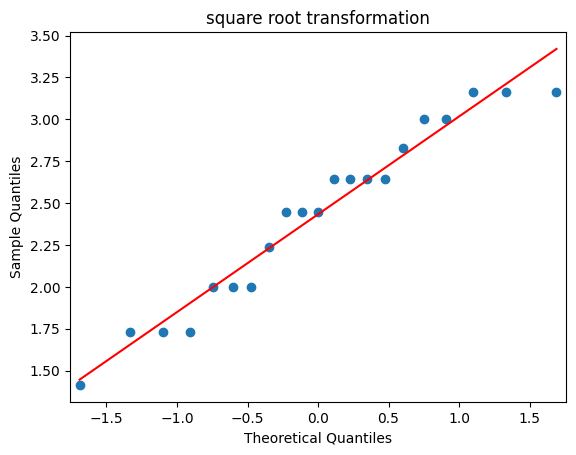

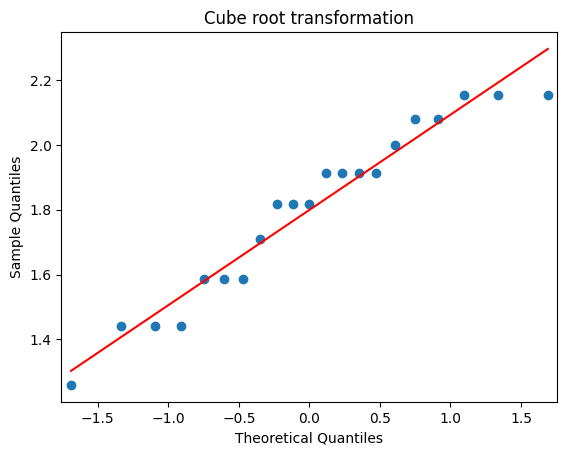

In [ ]:
smf.qqplot(df['Sorting_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting_time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Important Note:
We only Perform any data transformation when the data is skewed or not normal

Step 7 MODEL BUILDING AND TESTING

Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=df).fit()
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

from above it is inferred that

intercept = βo = 6.582734  
 β1 = 1.649020  
therefore equation  
y(Sorting_time)= β1(x)+βo
y=1.65x+6.58

In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        17:32:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 value is 0.682 means accuracy is 68.2%

In [ ]:
pred = model.predict(df)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
rmse_lin = np.sqrt(np.mean(np.array(df['Delivery_time'])-np.array(pred))**2)
rmse_lin

6.259543148362787e-15

Cube Root transformation on Data

In [ ]:
model2 = smf.ols("np.cbrt(Delivery_time)~np.cbrt(Sorting_time)",data=df).fit()
model2.params

Intercept                1.013571
np.cbrt(Sorting_time)    0.845585
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 19 Sep 2023   Prob (F-statistic):           4.90e-07
Time:                            17:32:59   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 value is 0.744 means the accuracy is 74.4%

In [ ]:
pred2 = model2.predict(df)

In [ ]:
pred2

0     2.835329
1     2.355854
2     2.550101
3     2.772459
4     2.835329
5     2.550101
6     2.631117
7     2.233116
8     2.835329
9     2.772459
10    2.704741
11    2.355854
12    2.631117
13    2.233116
14    2.233116
15    2.355854
16    2.550101
17    2.631117
18    2.078941
19    2.631117
20    2.459501
dtype: float64

In [ ]:
model2.resid

0    -0.076404
1     0.025248
2     0.152959
3     0.112041
4     0.236988
5    -0.064854
6     0.037285
7    -0.115204
8    -0.219449
9    -0.115812
10    0.001964
11   -0.148851
12   -0.076071
13    0.024063
14    0.058219
15    0.103764
16   -0.154391
17   -0.005048
18   -0.078941
19   -0.018652
20    0.321148
dtype: float64

In [ ]:
model2.resid_pearson

array([-0.55873422,  0.184635  ,  1.11856824,  0.81933613,  1.7330607 ,
       -0.47427135,  0.27265806, -0.84246939, -1.60480169, -0.8469177 ,
        0.01436188, -1.08852641, -0.55629712,  0.17596941,  0.42574754,
        0.75881341, -1.12903884, -0.0369137 , -0.57728755, -0.13639999,
        2.34850758])

In [ ]:
rmse_lin = np.sqrt(np.mean(np.array(df['Delivery_time'])-np.array(pred2))**2)
rmse_lin

14.255915978274071


Log transformation on Data

In [ ]:
model3 = smf.ols("np.log(Delivery_time)~np.log(Sorting_time)",data=df).fit()
model3.params

Intercept               1.741987
np.log(Sorting_time)    0.597522
dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 19 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                           17:32:59   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R square value is 0.772 so accuracy is 77.2%

In [ ]:
pred3 = model3.predict(df)
pred3

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [ ]:
model3.resid

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64

In [ ]:
rmse_lin=np.sqrt(np.mean(np.array(df['Delivery_time']-np.array(pred3))**2))
rmse_lin

14.791938693055753

Square Root transformation on data

In [ ]:
model4 = smf.ols("np.sqrt(Delivery_time)~np.sqrt(Sorting_time)",data=df).fit()
model4.params

Intercept                1.613479
np.sqrt(Sorting_time)    1.002217
dtype: float64

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 19 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                            17:32:59   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2 is 0.729 so the accuracy is 72.9%

In [ ]:
pred4 = model4.predict(df)
pred4

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

In [ ]:
model4.resid

0    -0.200191
1     0.056322
2     0.375699
3     0.278850
4     0.602398
5    -0.150491
6     0.093804
7    -0.267162
8    -0.551928
9    -0.290002
10    0.004913
11   -0.339193
12   -0.180980
13    0.041796
14    0.119060
15    0.239548
16   -0.360299
17   -0.009511
18   -0.202400
19   -0.042537
20    0.782305
dtype: float64

In [ ]:
rmse_lin=np.sqrt(np.mean(np.array(df['Delivery_time']-np.array(pred4))**2))
rmse_lin

13.51939241499564

PREDICTION

In [ ]:
# for better prediction model3(by log transformation) is suitable because of high rsquared value  & low rmse value compare to other models
predicted = pd.DataFrame()
predicted['Sorting_time'] = df.Sorting_time
predicted['Delivery_time'] = df.Delivery_time
predicted['Predicted_Delivery_time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_time)))
predicted

,Sorting_time,Delivery_time,Predicted_Delivery_time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


Predicitng from Original Model without any data transformation

In [ ]:
predicted1 = pd.DataFrame()
predicted1['Sorting_time'] = df.Sorting_time
predicted1['Delivery_time'] = df.Delivery_time
predicted1['Predicted_Delivery_time'] = pd.DataFrame(model.predict(predicted1.Sorting_time))
predicted1

,Sorting_time,Delivery_time,Predicted_Delivery_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
